# Population By Suburb

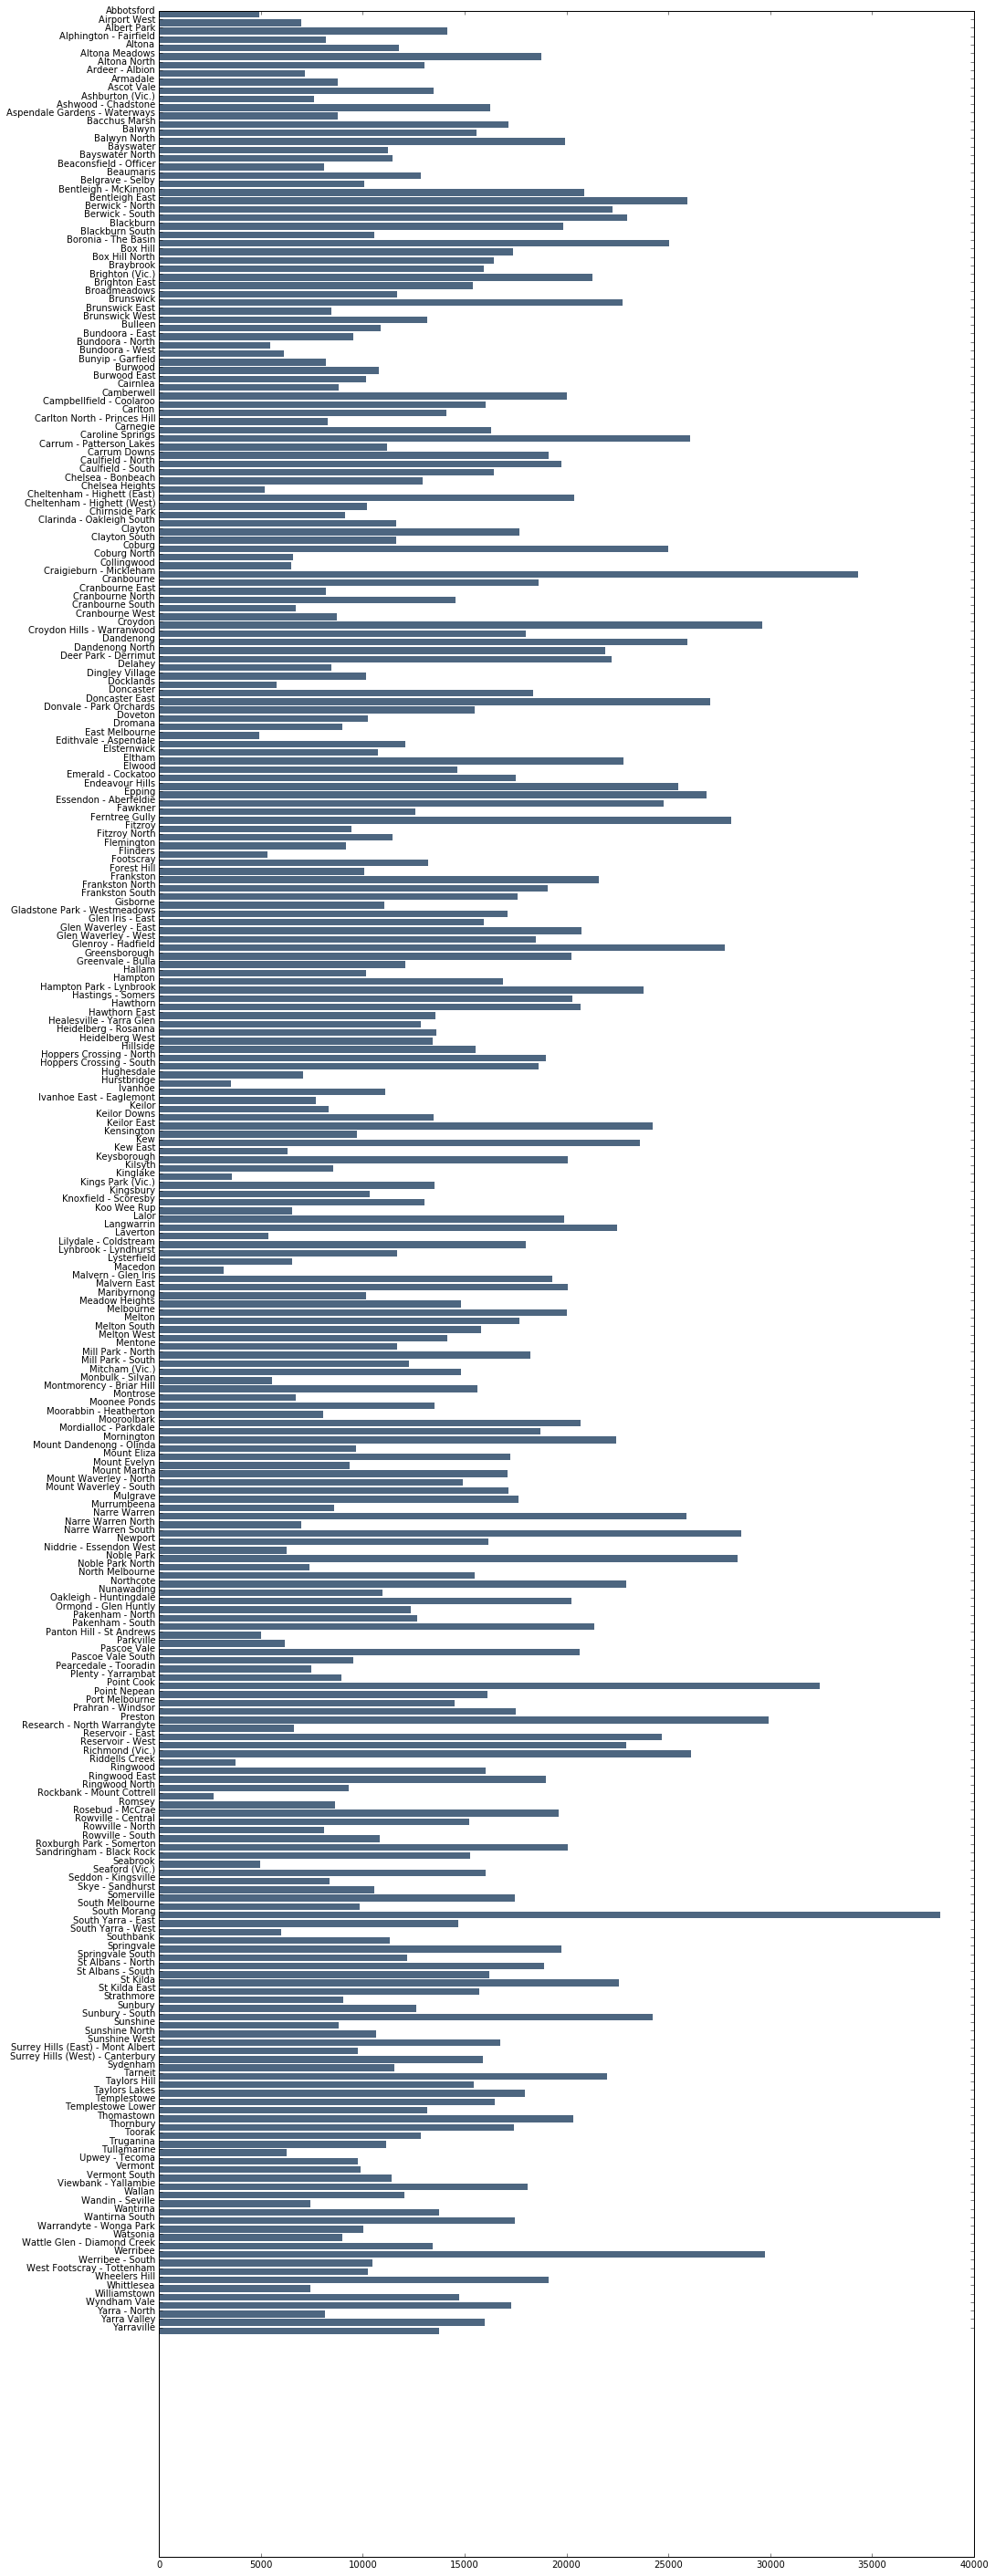

In [64]:
import json
from numpy import arange
import matplotlib.pyplot as plt

%matplotlib inline 

# Set resolution
fig = plt.figure(figsize=(16.0, 50.0))      
# Read jsonfile
with open('population_parse.json') as L:
    data = json.load(L)
    
location = []
population = []
# Retrieve respective data
for feature in data['melbourne']:
    suburb = feature['suburb'].encode('utf-8')
    people = feature['population'].encode('utf-8')
    if people != "0":
        location.append(suburb)
        population.append(int(people))
    
# Ploting bar graph
plt.barh(arange(len(population)),population, color=(0.3,0.4,0.5), linewidth=0)
plt.yticks(arange(len(location)),location)
plt.gca().invert_yaxis()
plt.show()


# School By Suburb

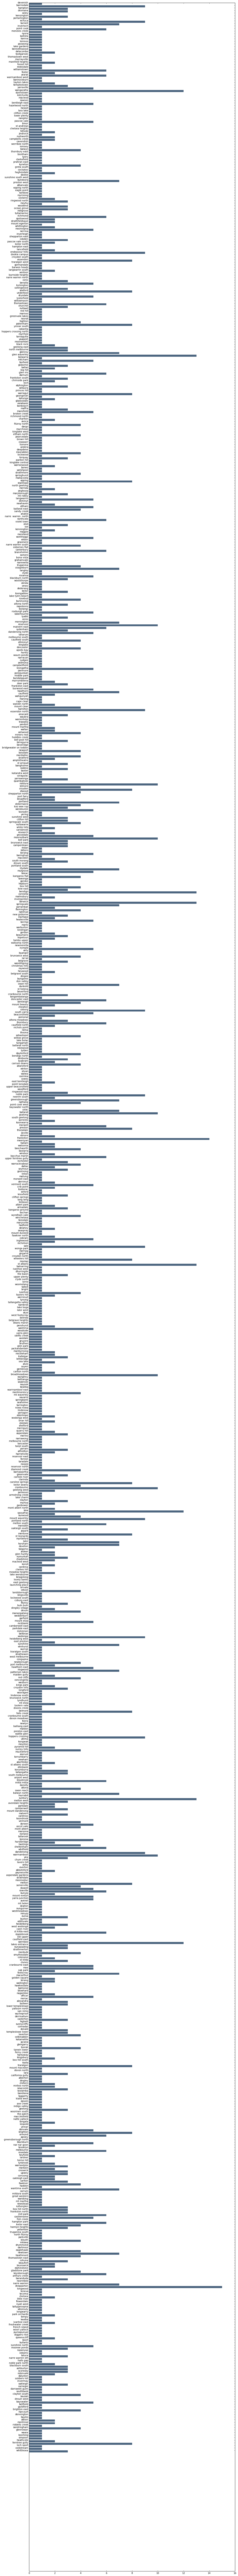

In [65]:
import csv
from numpy import arange
import matplotlib.pyplot as plt

# Set resolution
fig = plt.figure(figsize=(16.0, 200.0))  

# Read CSV file
with open('allschoolslist2016.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    # Ignore the header row
    next(reader)
    school_name = []
    suburb = []
    for each in reader:
        school_name = school_name + [each[3]]#create list of school names
        suburb = suburb + [each[8]]#create list of school location names

# getting unique values and sorted values on suburbs
unique_suburb = set([each.lower() for each in suburb])
sorted_suburb = sorted([each.lower() for each in suburb])

sch_num = []
# create list contain -> [suburb : number of school in each suburb]
for loc in unique_suburb:
    sch_num.append([loc, 0])
# every time a name appears, school number will be incremented respectively
for loc in sorted_suburb:
    for each in sch_num:
        if loc == each[0]:
            each[1] += 1
            
sch = []
num = []
# group suburb and number of schools seperately.
for each in sch_num:
    sch.append(each[0])
    num.append(each[1])
# Ploting bar graph
plt.barh(arange(len(num)),num, color=(0.3,0.4,0.5), linewidth=0)
plt.yticks(arange(len(sch)),sch)
plt.gca().invert_yaxis()
plt.show()


# Bubble Plot

In [1]:
"""""""""""""""""""""""""""""""""""""""""""""""
    ||       Program by: Hang Chen Xiong  ||
    ||       ID: 753057                   ||
    ||       Date: May 2016               ||
    ||       Project - COMP20008          ||
"""""""""""""""""""""""""""""""""""""""""""""""
import csv
import json
import math
from numpy import arange
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
tls.set_credentials_file(username='xiongxhc', api_key='hiu9ddpjlx')

# Read jsonfile
with open('population_parse.json') as L:
    data = json.load(L)  
# Read CSV file
with open('allschoolslist2016.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    # Ignore the header row
    next(reader)
    school_name = []
    s_suburb = []
    for each in reader:
        school_name = school_name + [each[3]]#create list of school names
        s_suburb = s_suburb + [each[8]]#create list of school location names

# getting unique values and sorted values on suburbs
unique_suburb = set([each.lower() for each in s_suburb])
sorted_suburb = sorted([each.lower() for each in s_suburb])

loc_sch = []
# create list contain -> [suburb : number of school in each suburb]
for loc in unique_suburb:
    loc_sch.append([loc, 0])
# every time a name appears, school number will be incremented respectively
for loc in sorted_suburb:
    for each in loc_sch:
        if loc == each[0]:
            each[1] += 1
#------------------------------------------------------------------------------#
sch_loc = []
sch_num = []
loc_and_sch = []
# group suburb and number of schools seperately.
for each in loc_sch:
    # Delete all spaceing
    each[0] = each[0].replace(' ','')
    sch_loc.append(each[0])
    sch_num.append(each[1])
# Creating list -> [suburb : amount of school]
loc_and_sch.append(sch_loc)
loc_and_sch.append(sch_num)
    
loc = []
pop = []
loc_and_pop = []
# Retrieve respective data
for feature in data['melbourne']:
    p_suburb = feature['suburb'].encode('utf-8')
    people = feature['population'].encode('utf-8')
    if people != "0":
        # replace all unnecessary characters
        p_suburb = p_suburb.replace(' ','').replace('-','')\
            .replace('Vic.','').replace('(','').replace(')','').lower()
        loc.append(p_suburb)
        pop.append(int(people))
# Creating list -> [suburb : population]        
loc_and_pop.append(loc)
loc_and_pop.append(pop)
#print (loc_and_pop[0][0], loc_and_pop[1][0])

#------------------------------------------------------------------------------#
suburb_pop_sch = []
# Comparison test to gather matching suburb name
for i in loc_and_pop[0]:
    for j in loc_and_sch[0]:
        if i==j:
            pop_val = loc_and_pop[1][loc_and_pop[0].index(i)]
            sch_val = loc_and_sch[1][loc_and_sch[0].index(j)]
            # Creating list -> [matched suburb : population : amount of school] 
            suburb_pop_sch.append([i,pop_val,sch_val])
# 274 suburbs in 'loc'
# 954 suburbs in 'sch_loc'
# ====> 181 suburbs matches
#------------------------------------------------------------------------------#
x_pop = []
y_sch = []
suburb_name = []
bubble_size = []
slope = 2.4e-2
# retrieve school, population and suburb name data
for i in suburb_pop_sch:
    x_pop.append(i[1])
    y_sch.append(i[2])
    suburb_name.append(i[0])
    bubble_size.append(math.sqrt(i[1]*slope))
#------------------------------------------------------------------------------#
# Scatter plot using plotly
points = go.Scatter(
    x = x_pop,
    y = y_sch,
    mode='markers',
    name='Each Suburb',
    marker=dict(
        size=bubble_size,
        line=dict(width=1),
        color = y_sch, #set color equal to a variable
        colorscale='Viridis',
        showscale=True,
        sizeref=0.7
        ),
    text = suburb_name
)
data = [points]
# Defining graph layout 
layout = go.Layout(
    title='(Amount of School v. Population) by Suburbs',
    hovermode='closest',
    xaxis=dict(
        title='Population',
        ticklen=5,
        zeroline=False,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Number of Schools',
        ticklen=5,
        gridwidth=2,
    ),
)
#------------------------------------------------------------------------------#
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='suburb_sch-v-pop')


# Summary Chart

In [2]:
"""""""""""""""""""""""""""""""""""""""""""""""
    ||       Program by: Hang Chen Xiong  ||
    ||       ID: 753057                   ||
    ||       Date: May 2016               ||
    ||       Project - COMP20008          ||
"""""""""""""""""""""""""""""""""""""""""""""""

import csv
import json
import math
import numpy as np
from numpy import arange
import plotly.plotly as py
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
import plotly.tools as tls
tls.set_credentials_file(username='xiongxhc', api_key='hiu9ddpjlx')

# Read jsonfile
with open('population_parse.json') as L:
    data = json.load(L)  
# Read CSV file
with open('allschoolslist2016.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    # Ignore the header row
    next(reader)
    school_name = []
    s_suburb = []
    for each in reader:
        school_name = school_name + [each[3]]#create list of school names
        s_suburb = s_suburb + [each[8]]#create list of school location names

# getting unique values and sorted values on suburbs
unique_suburb = set([each.lower() for each in s_suburb])
sorted_suburb = sorted([each.lower() for each in s_suburb])

loc_sch = []
# create list contain -> [suburb : number of school in each suburb]
for loc in unique_suburb:
    loc_sch.append([loc, 0])
# every time a name appears, school number will be incremented respectively
for loc in sorted_suburb:
    for each in loc_sch:
        if loc == each[0]:
            each[1] += 1
#------------------------------------------------------------------------------#
sch_loc = []
sch_num = []
loc_and_sch = []
# group suburb and number of schools seperately.
for each in loc_sch:
    # Delete all spaceing
    each[0] = each[0].replace(' ','')
    sch_loc.append(each[0])
    sch_num.append(each[1])
# Creating list -> [suburb : amount of school]
loc_and_sch.append(sch_loc)
loc_and_sch.append(sch_num)
    
loc = []
pop = []
loc_and_pop = []
# Retrieve respective data
for feature in data['melbourne']:
    p_suburb = feature['suburb'].encode('utf-8')
    people = feature['population'].encode('utf-8')
    if people != "0":
        # replace all unnecessary characters
        p_suburb = p_suburb.replace(' ','').replace('-','')\
            .replace('Vic.','').replace('(','').replace(')','').lower()
        loc.append(p_suburb)
        pop.append(int(people))
# Creating list -> [suburb : population]        
loc_and_pop.append(loc)
loc_and_pop.append(pop)
#print (loc_and_pop[0][0], loc_and_pop[1][0])

#------------------------------------------------------------------------------#
suburb_pop_sch = []
# Comparison test to gather matching suburb name
for i in loc_and_pop[0]:
    for j in loc_and_sch[0]:
        if i==j:
            pop_val = loc_and_pop[1][loc_and_pop[0].index(i)]
            sch_val = loc_and_sch[1][loc_and_sch[0].index(j)]
            # Creating list -> [matched suburb : population : amount of school] 
            suburb_pop_sch.append([i,pop_val,sch_val])
# 274 suburbs in 'loc'
# 954 suburbs in 'sch_loc'
# ====> 181 suburbs matches
#------------------------------------------------------------------------------#
x_pop = []
x_sch = []
suburb_name = []
# retrieve school, population and suburb name data
for i in suburb_pop_sch:
    x_pop.append(i[1])
    x_sch.append(i[2])
    suburb_name.append(i[0])
x_pop.reverse()
x_sch.reverse()
suburb_name.reverse()
#------------------------------------------------------------------------------#
# bar plot for school data
graph1 = go.Bar(
    x=x_sch,
    y=suburb_name,
    marker=dict(color='rgba(50, 171, 96, 0.6)'),
    name='Number of School per Suburb',
    orientation='h',
)
# scatter ploting for population
graph2 = go.Scatter(
    x=x_pop,
    y=suburb_name,
    mode='lines+markers',
    line=dict(color='rgb(255, 136, 77)'),
    name='Population per Suburb',
)
#------------------------------------------------------------------------------#
# setting layout of the ploting
layout = dict(
    title='Number of School & Population per Suburb',
    yaxis1=dict(
        showgrid=False,showline=False,showticklabels=True,
        domain=[0, 1],
    ),
    yaxis2=dict(
        showgrid=False,showline=True,showticklabels=False,
        linewidth=2,
        domain=[0, 1],
    ),
    xaxis1=dict(
        zeroline=False,showline=False,showticklabels=True,showgrid=True,
        domain=[0, 0.5],
        side='top',
        dtick=8,
    ),
    xaxis2=dict(
        zeroline=False,showline=False,showticklabels=True,showgrid=True,
        domain=[0.5, 1],
        side='top',
        dtick=20000,
    ),
    legend=dict(
        font=dict(size=12)
    ),
    margin=dict(l=120,r=20,t=70,b=70,),
    width=600,
    height=1800,
)
#------------------------------------------------------------------------------#
annotations = []
# Adding labels
for i, j, name in zip(x_pop, x_sch, suburb_name):
    # labeling the population
    annotations.append(dict(xref='x2', yref='y2', y=name, x=i+12000,
                                  text=format(i) + ' people',
                                  font=dict(family='Arial', size=12,
                                            color='rgb(255, 136, 77)'),
                                  showarrow=False,))
    # labeling the number of schools
    annotations.append(dict(xref='x1', yref='y1', y=name, x=j+3,
                                  text=str(j) + ' Schools',
                                  font=dict(family='Arial', size=12,
                                            color='rgb(50, 171, 96)'),
                                  showarrow=False,))

layout['annotations'] = annotations

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], 
                          shared_xaxes=True,shared_yaxes=False,
                          vertical_spacing=0.001)

fig.append_trace(graph1, 1, 1)
fig.append_trace(graph2, 1, 2)
#------------------------------------------------------------------------------#
fig['layout'].update(layout)
py.plot(fig, filename='graph_sch&pop')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



u'https://plot.ly/~xiongxhc/8'